# Procesos Estocásticos HW 1

Este notebook está para acompañar al PDF.

- Apellidos: Sotillo del Horno
- Nombre: Iván
  

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
import math

## Ejercicio 1

Illustrate the validity of the derivation by comparing the empirical distribution obtained in a simulation of the Poisson process and the theoretical distribution of P [N (t) = n] given by Eq. (4) for the values λ = 10, t = 2.


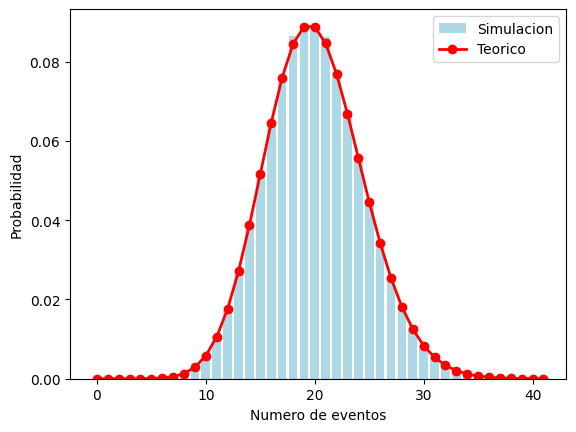

In [33]:
lam = 10
t = 2
N = 100000

# Simulacion
simulation = np.random.poisson(lam * t, N)

# Valores teoricos
n_values = np.arange(0, max(simulation) + 1)
theoretical = poisson.pmf(n_values, lam * t)

# Histograma
_ = plt.hist(simulation, bins=n_values - 0.5, density=True,
             rwidth=0.8, color='lightblue',  label='Simulacion')

# Grafico teorico
_ = plt.plot(n_values, theoretical, 'ro-', linewidth=2, label='Teorico')

plt.xlabel('Numero de eventos')
plt.ylabel('Probabilidad')
plt.legend()
plt.show()

## Ejercicio 2

Simulate a Poisson process with $λ = 5.0$. From these simulations show for diﬀerent values of $n = 1, 2, 5, 10$
that the probability density of the nth arrival is

$$f_{S_n}(t) = \frac{λ^n t^{n-1} e^{-λt}}{(n-1)!}$$

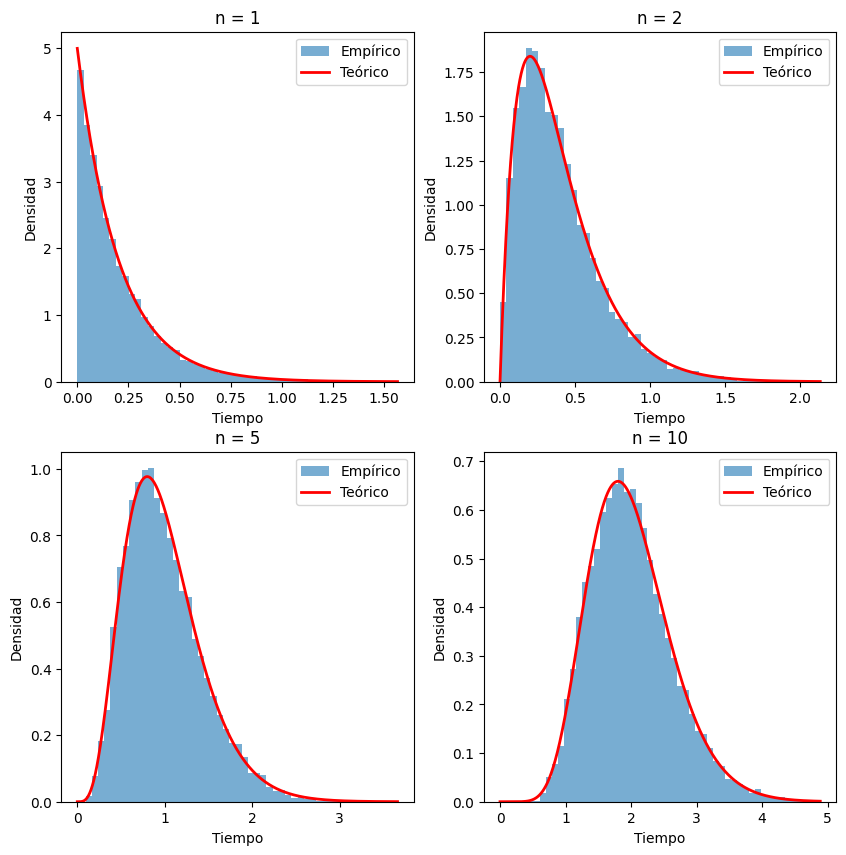

In [34]:
lam = 5.0
N = 10000
n_values = np.array([1, 2, 5, 10])

# Diccionario de los valores n-simos
event_times = {n: [] for n in n_values}

# Simulacion
for _ in range(N):
    interarrival_times = np.random.exponential(1 / lam, max(n_values))
    arrival_times = np.cumsum(interarrival_times)

    for n in n_values:
        event_times[n].append(arrival_times[n - 1])

# Histograma
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.ravel()

for i, n in enumerate(n_values):
    axs[i].hist(event_times[n], bins=50, density=True, alpha=0.6, label="Empírico")

    # Valores teoricos
    t_values = np.linspace(0, max(event_times[n]), 1000)
    theoretical_density = (lam ** n) * (t_values ** (n - 1)) * np.exp(-lam * t_values) / math.factorial(n - 1)

    axs[i].plot(t_values, theoretical_density, 'r-', linewidth=2, label="Teórico")
    axs[i].set_title(f'n = {n}')
    axs[i].set_xlabel('Tiempo')
    axs[i].set_ylabel('Densidad')
    axs[i].legend()
